# Uploading and preparing data

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


file_path = "iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_type']
iris_data = pd.read_csv(file_path, header=None, names=columns)

X = iris_data.iloc[:, :-1].to_numpy()
y = iris_data['iris_type'].to_numpy() 

print(f"Size of signs: {X.shape}, Value memory: {X.nbytes} bytes")
print(f"The size of the target variable: {y.shape}, Value memory: {y.nbytes} bytes")

Size of signs: (150, 4), Value memory: 4800 bytes
The size of the target variable: (150,), Value memory: 1200 bytes


# Data normalization

In [24]:
X_normalized = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Converting a feature to a categorical one

In [25]:
feature = X_normalized[:, 0]

categories = np.empty(feature.shape, dtype=object)
categories[feature < 0.25] = 'small'
categories[(feature >= 0.25) & (feature <= 0.75)] = 'medium'
categories[feature > 0.75] = 'big'

print(np.unique(categories, return_counts=True))

(array(['big', 'medium', 'small'], dtype=object), array([12, 97, 41], dtype=int64))


# Division into samples

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Classification using sklearn

In [27]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Experiments with hyperparameters

In [28]:
# Experiment 1: A different type of core
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_poly.fit(X_train, y_train)
accuracy_poly = accuracy_score(y_test, svc_poly.predict(X_test))

# Experiment 2: Without normalization
svc_non_norm = SVC(kernel='linear', random_state=42)
svc_non_norm.fit(X_train * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0), y_train)
accuracy_non_norm = accuracy_score(y_test, svc_non_norm.predict(X_test))

# Experiment 3: Increasing the test sample
X_train_large, X_test_small, y_train_large, y_test_small = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
svc_model_large = SVC(kernel='linear', random_state=42)
svc_model_large.fit(X_train_large, y_train_large)
accuracy_large = accuracy_score(y_test_small, svc_model_large.predict(X_test_small))

print(f"Precision with polynomial kernel: {accuracy_poly:.2f}")
print(f"Accuracy without normalization: {accuracy_non_norm:.2f}")
print(f"Accuracy with increased test sample: {accuracy_large:.2f}")

Precision with polynomial kernel: 0.93
Accuracy without normalization: 0.33
Accuracy with increased test sample: 1.00


# Dimensionality reduction and visualization

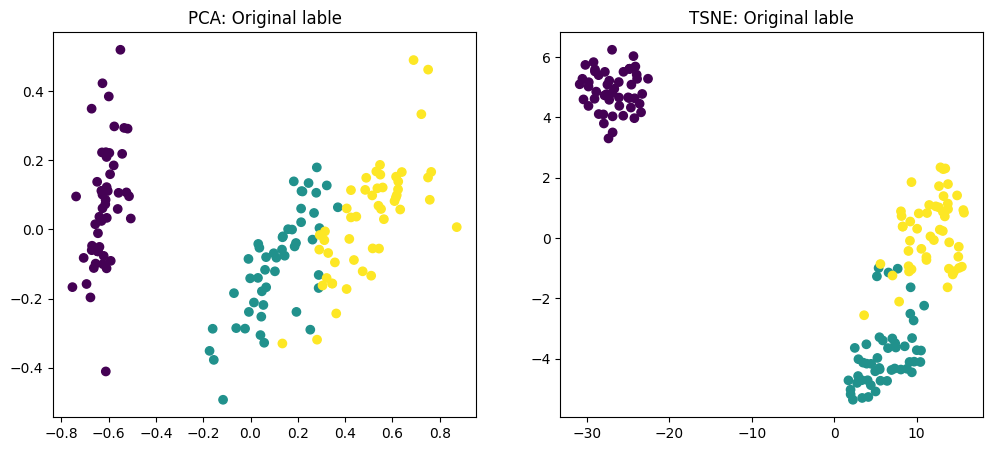

In [29]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

# The original label of the iris
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='viridis')
plt.title("PCA: Original lable")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y)[0], cmap='viridis')
plt.title("TSNE: Original lable")

plt.show()

# The final graph for the predicted labels

Text(0.5, 1.0, 'TSNE: Prediction for label')

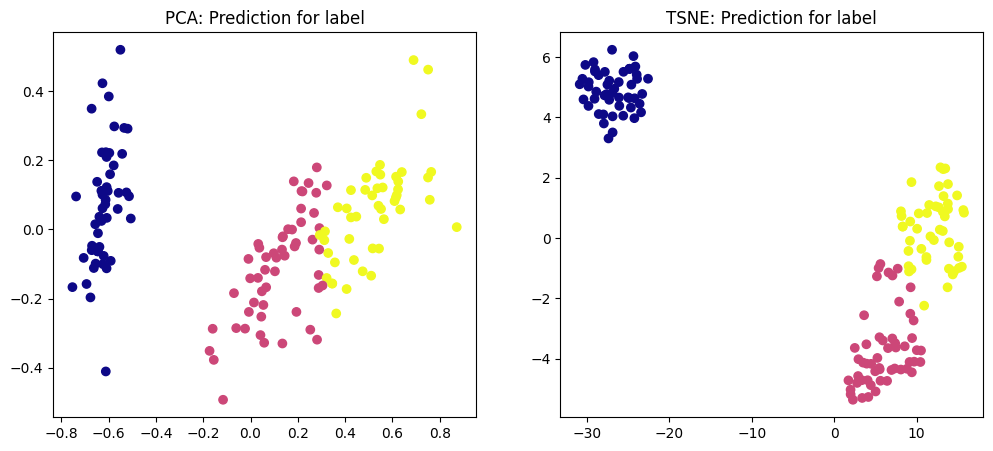

In [30]:
# Label predictions for visualization
y_pred_all = svc_model.predict(X_normalized)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_pred_all)[0], cmap='plasma')
plt.title("PCA: Prediction for label")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y_pred_all)[0], cmap='plasma')
plt.title("TSNE: Prediction for label")

# Conclusion

As part of this work, we downloaded the Iris dataset and processed it. The data was normalized, one of the features was converted to a categorical format, and the separation into training and test samples was performed. The training of the SVC classification model showed a fairly high accuracy, and the use of dimensionality reduction methods (PCA and t-SNE) made it possible to visualize the data in a compressed form.

# Calculating the accuracy of the model

In [31]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model: {accuracy:.2f}")

report = classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor", "Virginica"])
print(report)

The accuracy of the model: 1.00
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



The SVC model with a linear core demonstrated 100% accuracy in the test sample, which indicates the high efficiency of classification of this dataset. Data normalization has had a positive impact by improving the convergence of the algorithm. Changing the core of the model to a polynomial one did not give an increase in accuracy

Visualization using PCA showed that the data is well separated in a compressed form, and the classes of irises have minimal intersections. Analysis using t-SNE revealed a more complex data structure and showed some class overlaps. The visualizations based on the predicted labels match the original data, which confirms the high accuracy of the model.